In [1]:
import numpy as np
import pandas as pd
from IPython.display import HTML
from pandarallel import pandarallel
pandarallel.initialize()

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
path_shared = '~/Downloads/nfl-big-data-bowl-2021/{}'

games_df = pd.read_csv(path_shared.format('games.csv'))
plays_df = pd.read_csv(path_shared.format('plays.csv'))
pbp_2018 = pd.read_csv("/Users/Rishav/Downloads/play_by_play_2018.csv")
pbp_joined = pd.merge(plays_df,pbp_2018,how = "left",left_on = ["gameId", "playId"] ,right_on = ["old_game_id", "play_id"])



pbp_joined["retractable"] = np.where(((pbp_joined['roof'] == "open ") | (pbp_joined['roof'] == "closed")), 1, 0)

pbp_joined["dome"] = np.where((pbp_joined['roof'] == "dome"), 1, 0)
pbp_joined["outdoors"] = np.where((pbp_joined['roof'] == "outdoors"), 1, 0)
pbp_joined["era0"] = 0
pbp_joined["era1"] = 0
pbp_joined["era2"] = 0
pbp_joined["era3"] = 0
pbp_joined["era4"] = 1
pbp_joined["down1"] = np.where((pbp_joined['down_x'] == 1),1,0)
pbp_joined["down2"] = np.where((pbp_joined['down_x'] == 2),1,0)
pbp_joined["down3"] = np.where((pbp_joined['down_x'] == 3),1,0) 
pbp_joined["down4"] = np.where((pbp_joined['down_x'] == 4),1,0)
pbp_joined["home"] = np.where((pbp_joined['posteam'] == pbp_joined['home_team']),1,0)


players_df = pd.read_csv(path_shared.format('players.csv'))
track_df = pd.read_csv(path_shared.format('week1_norm.csv'))

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (172,173,174,175,184,185,188,189,194,195,196,197,209,210,211,232,233,237,238,239,244,246,247,277) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
params = lambda: None # create an empty object to add params
params.a_max = 7
params.s_max = 9
params.reax_t = params.s_max/params.a_max
params.avg_ball_speed = 20
params.tti_sigma = 0.45
params.cell_length = 1
vars(params)


{'a_max': 7,
 's_max': 9,
 'reax_t': 1.2857142857142858,
 'avg_ball_speed': 20,
 'tti_sigma': 0.45,
 'cell_length': 1}

In [4]:
#game_id = 2018122314
#play_id = 4239
game_id = 2018090905
play_id = 2062
# game_id, play_id = random.choice(plays)

play_df = track_df[(track_df.playId == play_id) & (track_df.gameId == game_id)].sort_values(by = 'frameId')
play_df.head()

,gameId,playId,frameId,event,nflId,displayName,jerseyNumber,position,team,team_pos,teamAbbr,route,time,los,x,y,dis,o,s,s_dir,s_dir_rad,v_x,v_y,v_theta,v_mag,a_old,a_x,a_y,a_theta,a_mag
317421,2018090905,2062,1,None,496735.0,Kareem Jackson,25.0,CB,away,DEF,HOU,NaN,2018-09-09T18:28:11.700Z,40,54.51,31.08,0.08,260.44,0.83,108.40,1.89,0.79,-0.26,-0.32,0.83,0.38,0.0,0.0,0.0,0.0
317434,2018090905,2062,1,None,0.0,Football,NaN,NaN,football,FTBL,FTBL,NaN,2018-09-09T18:28:11.700Z,40,40.18,29.52,0.00,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
317433,2018090905,2062,1,None,2558094.0,Zach Cunningham,41.0,ILB,away,DEF,HOU,NaN,2018-09-09T18:28:11.700Z,40,44.36,32.36,0.05,263.88,0.49,262.25,4.58,-0.49,-0.07,0.14,0.49,0.72,0.0,0.0,0.0,0.0
317432,2018090905,2062,1,None,2552490.0,Benardrick McKinney,55.0,ILB,away,DEF,HOU,NaN,2018-09-09T18:28:11.700Z,40,41.88,23.53,0.10,220.61,0.95,298.75,5.21,-0.83,0.46,-0.50,0.95,0.03,0.0,0.0,0.0,0.0
317430,2018090905,2062,1,None,2552261.0,Kevin Johnson,30.0,CB,away,DEF,HOU,NaN,2018-09-09T18:28:11.700Z,40,48.40,17.56,0.05,135.60,0.50,27.09,0.47,0.23,0.45,1.10,0.50,0.46,0.0,0.0,0.0,0.0


dict_keys(['1-closest-defender-distance', '1-closest-defender-x', '1-closest-defender-y', 'y', '5-closest-defender-distance', '5-closest-defender-speed', '2-closest-defender-distance', '2-closest-defender-speed', '4-closest-defender-x', '2-closest-defender-y', '1-closest-defender-speed', '2-closest-defender-x', '3-closest-defender-distance', '4-closest-defender-speed', '5-closest-defender-x', '3-closest-defender-speed', '3-closest-defender-x', '4-closest-defender-y', '3-closest-defender-y', '4-closest-defender-distance', '5-closest-defender-y'])
[00:43:37] /usr/local/lib/python3.7/site-packages/treelite_runtime/predictor.py:309: Dynamic shared library /Users/Rishav/Documents/2021bdbwinners/BigDataBowl/analysis/xyacmymodel.dylib has been successfully loaded into memory
ADDED NEW SHIT
[00:43:39] /usr/local/lib/python3.7/site-packages/treelite_runtime/predictor.py:309: Dynamic shared library /Users/Rishav/Documents/2021bdbwinners/BigDataBowl/analysis/epa_no_time_mymodel.dylib has been suc

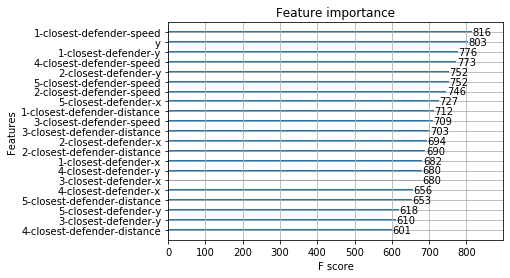

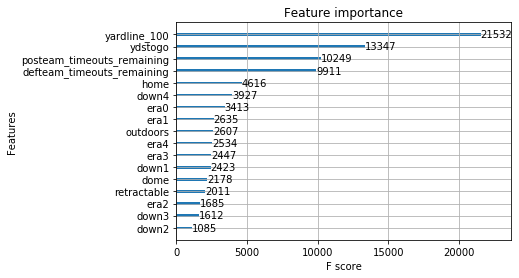

In [43]:
import xgboost as xgb
import joblib
import treelite_runtime
bst = joblib.load("xyac_model.model")
xgb.plot_importance(bst)
scores = bst.get_score(importance_type='gain')
print(scores.keys())
cols_when_model_builds = bst.feature_names
xyac_predictor = treelite_runtime.Predictor('./xyacmymodel.dylib', verbose=True)
print("ADDED NEW SHIT")


epa_model = joblib.load("epa_model_rishav_no_time.model")
xgb.plot_importance(epa_model)
scores = epa_model.get_score(importance_type='gain')
cols_when_model_builds_ep = epa_model.feature_names
epa_predictor = treelite_runtime.Predictor('./epa_no_time_mymodel.dylib', verbose=True)

print("ADDED MEME")

In [146]:
#### WE WILL CALCULATE THE EP MATRIX HERE TO MAKE THINGS EZ

### GET ENDPOINTS

x = np.linspace(0.5, 119.5, 120)
epvals = np.array([7,-7,3,-3,2,-2,0])
joined_df = pbp_joined[(pbp_joined.playId == play_id) & (pbp_joined.gameId == game_id)]

    
epa_df = pd.DataFrame({
        'play_endpoint_x': x,
     })

test = {}
for feat in epa_model.feature_names:
    test[feat] = [joined_df.iloc[0][feat]]
    epa_df[feat] = joined_df.iloc[0][feat]

first_df = pd.DataFrame(test)

dtest = treelite_runtime.Batch.from_npy2d(first_df[cols_when_model_builds_ep].values)
ypred = epa_predictor.predict(dtest)
ep = np.sum(ypred*epvals, axis = 1)
print(ep)
print("YAY")
epa_df["before_play_ep"] = ep[0]
    
    
    
epa_df['los'] = 100 - epa_df['yardline_100']
epa_df['first_down_line'] = epa_df['los'] + epa_df["ydstogo"] #fix this
epa_df['expected_end_up_line'] = epa_df['play_endpoint_x']

epa_df['isFirstDown'] = 0
epa_df['isFirstDown'] = np.where(epa_df['expected_end_up_line'] >= epa_df['first_down_line'], 1, 0)

epa_df['yardline_100'] = np.round(110 - epa_df['expected_end_up_line'])
epa_df['yardline_100'] = np.where(epa_df['yardline_100'] > 100, 100 , epa_df['yardline_100'])
epa_df['ydstogo'] = epa_df['first_down_line'] - epa_df['expected_end_up_line']
epa_df['ydstogo'] = np.where(epa_df['isFirstDown'] == 1, 10, epa_df['ydstogo'])
downthing = joined_df.iloc[0]['down_x']
print(downthing)
for d in range(1,4):
    epa_df['down%d' % d] = 1 if (d == downthing+1) else 0
    
epa_df['down1'] = np.where(epa_df['isFirstDown'] == 1, 1, epa_df['down1'])
epa_df['down2'] = np.where(epa_df['isFirstDown'] == 1, 0, epa_df['down2'])
epa_df['down3'] = np.where(epa_df['isFirstDown'] == 1, 0, epa_df['down3'])
epa_df['down4'] = np.where(epa_df['isFirstDown'] == 1, 0, epa_df['down4'])

### UPDATE EPA VARIABLES

dtest = treelite_runtime.Batch.from_npy2d(epa_df[cols_when_model_builds_ep].values)
ypred = epa_predictor.predict(dtest)
ep = np.sum(ypred*epvals, axis = 1)
epa_df['xep'] = ep
### SCORE SAFETIES
epa_df['xep'] = np.where(epa_df['play_endpoint_x'] < 10, -2, epa_df['xep'])
### SCORE Tds 
epa_df['xep'] = np.where(epa_df['play_endpoint_x'] > 110, 7, epa_df['xep'])

epa_df['xepa'] = epa_df['xep'] - epa_df['before_play_ep']

only_vals = epa_df[["play_endpoint_x", "xep", "xepa"]]

display(epa_df[epa_df.play_endpoint_x == 68.5])

### CALCULATE OUTPUT

[1.7271648]
YAY
1


,play_endpoint_x,yardline_100,home,retractable,dome,outdoors,ydstogo,era0,era1,era2,era3,era4,down1,down2,down3,down4,posteam_timeouts_remaining,defteam_timeouts_remaining,before_play_ep,los,first_down_line,expected_end_up_line,isFirstDown,xep,xepa
68,68.5,42.0,1,0,0,1,10.0,0,0,0,0,1,1,0,0,0,1.0,3.0,1.727165,41.0,51.0,68.5,1,2.556347,0.829182


In [143]:
%%time
import time
from scipy.spatial import distance
from ipdb import launch_ipdb_on_exception 

def get_field_df(play_frame_group):
    time1 = time.time()
    frame_df = play_frame_group.loc[(play_df.nflId!=0)]
    ball_start = frame_df.loc[frame_df.position=='QB', ['x', 'y']].iloc[0].round(0)
    frame_df = frame_df.loc[frame_df.position!='QB']
    #print(frame_df.columns)
    current_frame = min(frame_df.frameId)
    pocket_width = 10

    x = np.linspace(0.5, 119.5, 120)
    y = np.linspace(-0.5, 53.5, 55)
    y[0] = -0.2
    field_locs = np.stack(np.meshgrid(x, y)).reshape(2, -1).T  # (F, 2)
    
    T = np.linspace(0.1, 4, 40)
    receivers_df = frame_df.loc[frame_df.team_pos == 'DEF',['x', 'y', 'v_x', 'v_y', 'v_theta', 'v_mag', 'los', 'a_x', 'a_y']]
    dist_from_ball_np = np.linalg.norm((receivers_df.x - ball_start[0],
                                                     receivers_df.y - ball_start[1]), axis=0)
    # find the spot the qb would aim at, leading the receiver in their current dir by the ball time
    rec_x_np = receivers_df.x.to_numpy()[:,None]
    rec_y_np = receivers_df.y.to_numpy()[:,None]
    rec_v_x_np = receivers_df.v_x.to_numpy()[:,None]
    rec_v_y_np = receivers_df.v_y.to_numpy()[:,None]
    rec_a_x_np = receivers_df.a_x.to_numpy()[:,None]
    rec_a_y_np = receivers_df.a_y.to_numpy()[:,None]
    rec_v_theta_np = receivers_df.v_theta.to_numpy()[:,None]
    rec_v_x_r = rec_a_x_np*params.reax_t+rec_v_x_np
    rec_v_y_r = rec_a_y_np*params.reax_t+rec_v_y_np
    rec_v_r_mag = np.linalg.norm(np.array([rec_v_x_r, rec_v_y_r]), axis=0)
    rec_v_r_theta = np.arctan(rec_v_y_r/rec_v_x_r)
    
    #target_x = rec_x_np+rec_v_x_np*t+0.5*rec_a_x_np*t**2  # (R, T)
    #target_y = rec_y_np+rec_v_y_np*t+0.5*rec_a_y_np*t**2  # (R, T)
    
    x_r = rec_x_np + rec_v_x_np*params.reax_t + 0.5*rec_a_x_np*params.reax_t**2 #(R, 1)
    y_r = rec_y_np + rec_v_y_np*params.reax_t + 0.5*rec_a_y_np*params.reax_t**2 #(R, 1)
    
    reaction_player_locs = np.hstack((x_r, y_r)) # (R,2)
    reaction_player_vels = np.hstack((rec_v_x_r, rec_v_y_r)) # (R,2)
    
    int_d_vec = field_locs[:, None, :] - reaction_player_locs #(F, R, 2)
    int_d_mag = np.linalg.norm(int_d_vec, axis=2) # F, R
    int_theta = np.arctan(int_d_vec[:,:,1]/int_d_vec[:,:,0]) #this could be a problem
    
    
    int_s0 = np.clip(np.sum(int_d_vec*reaction_player_vels, axis=2)/int_d_mag, -params.s_max, params.s_max) #F, R,  #taking norm between vectors int_d and player velocity
        
    t_lt_smax = (params.s_max-int_s0)/params.a_max  #F, J,
    d_lt_smax = t_lt_smax*((int_s0+params.s_max)/2) #F, J,
    d_at_smax = int_d_mag - d_lt_smax               #F, J,
    t_at_smax = d_at_smax/params.s_max              #F, J,
    t_tot = t_lt_smax+t_at_smax                     #F, J,

    a1 =  np.broadcast_to(t_lt_smax[:,:,None],(*t_lt_smax.shape, len(T))) # F, J, T THIS IS TIME SPENT LT SMAX
    a2 =  np.broadcast_to(T[None,None,:],(*t_lt_smax.shape, len(T))) # F, J, T
    
    time_lt_smax = np.where(a1 > a2, a2, a1) # F, J, T  THIS IS TIME LESS THAN MAX
    time_at_smax = a2 - time_lt_smax # F, J, T THIS IS TIME MORE at max
    
    #print(time_lt_smax)
    #print(time_at_smax)
    
    
    d = time_at_smax * params.s_max + int_s0[:,:,None]*time_lt_smax + 0.5*params.a_max*np.square(time_lt_smax) # F, J, T
    # d should be at most the magnitude
    
    #print(d)
    #print(int_s0)
    ## d = Time at max speed * max speed + int_s0* time at lt_smax + 1/2 params.a_max (time at lt_smax * time at lt_smax) 
    #d = 
    v_proj = int_s0[:,:,None] + params.a_max*time_lt_smax # F, J, T
    v_proj = np.where(v_proj > params.s_max, params.s_max, v_proj) # F, J, T
    v_proj = np.abs(v_proj)
    x_proj = x_r + d* np.cos(int_theta[:,:,None]) # F, J, T
    y_proj = y_r + d* np.sin(int_theta[:,:,None]) # F, J, T
    
    x_proj_relv = x_proj -  field_locs[:,None,None,0] # F, J, T #GET RELATIVE COORDS
    y_proj_relv = y_proj -  field_locs[:,None,None,1] # F, J, T #GET RELATIVE COORDS
    
    
    projected_locations = np.stack((x_proj, y_proj), axis =3)  # F, J, T, 2
    
    distances_to_ball = projected_locations - field_locs[:,None,None,:] # F, J, T, 2
    distance_mags = np.linalg.norm(distances_to_ball, axis = 3) # F, J, T

    sorted_indices = np.argsort(distance_mags, axis = 1) # F, J, T

    distance_mags = np.take_along_axis(distance_mags,sorted_indices, axis = 1)
    x_proj_sorted = np.take_along_axis(x_proj_relv,sorted_indices, axis = 1) # F, J, T
    y_proj_sorted = np.take_along_axis(y_proj_relv,sorted_indices, axis = 1) # F, J, T
    v_proj_sorted = np.take_along_axis(v_proj,sorted_indices, axis = 1) # F, J, T
    
    just_top_5_distances = distance_mags[:,0:5,:].transpose((0,2,1)) #F, T, 5
    just_top_5_x_proj = x_proj_sorted[:,0:5,:].transpose((0,2,1)) #F, T, 5
    just_top_5_y_proj = y_proj_sorted[:,0:5,:].transpose((0,2,1))  #F, T, 5
    just_top_5_v_proj = v_proj_sorted[:,0:5,:].transpose((0,2,1))  #F, T, 5
    
    
    just_top_5_distances = np.reshape(just_top_5_distances, (just_top_5_distances.shape[0]*just_top_5_distances.shape[1],just_top_5_distances.shape[2]))
    just_top_5_x_proj  = np.reshape(just_top_5_x_proj, just_top_5_distances.shape)
    just_top_5_y_proj  = np.reshape(just_top_5_y_proj, just_top_5_distances.shape)
    just_top_5_v_proj  = np.reshape(just_top_5_v_proj, just_top_5_distances.shape)

    
    endpoints = np.repeat(field_locs, repeats = len(T), axis = 0) # FxT, 2
    times = np.repeat(T[None, :], repeats = len(field_locs), axis = 0)
    times_shaped = times.reshape((times.shape[0]*times.shape[1]))# FxT, 1
    value_array = np.array([-2.5,2.5,7.5,12.5,17.5, 22.5, 27.5, 30])
    
    
    field_df = pd.DataFrame({
        'pass_endpoint_x': endpoints[:,0],
        'pass_endpoint_y': endpoints[:,1],
        'frame_thrown' : current_frame,
        'time_of_flight' : times_shaped,
        '1-closest-defender-distance' : just_top_5_distances[:,0],
        '2-closest-defender-distance' : just_top_5_distances[:,1],
        '3-closest-defender-distance' : just_top_5_distances[:,2],
        '4-closest-defender-distance' : just_top_5_distances[:,3],
        '5-closest-defender-distance' : just_top_5_distances[:,4],
        '1-closest-defender-x' : just_top_5_x_proj[:,0],
        '2-closest-defender-x' : just_top_5_x_proj[:,1],
        '3-closest-defender-x' : just_top_5_x_proj[:,2],
        '4-closest-defender-x' : just_top_5_x_proj[:,3],
        '5-closest-defender-x' : just_top_5_x_proj[:,4],
        '1-closest-defender-y' : just_top_5_y_proj[:,0], 
        '2-closest-defender-y': just_top_5_y_proj[:,1], 
        '3-closest-defender-y': just_top_5_y_proj[:,2], 
        '4-closest-defender-y': just_top_5_y_proj[:,3], 
        '5-closest-defender-y': just_top_5_y_proj[:,4], 
        '1-closest-defender-speed' : just_top_5_v_proj[:,0],
        '2-closest-defender-speed': just_top_5_v_proj[:,1],
        '3-closest-defender-speed': just_top_5_v_proj[:,2],
        '4-closest-defender-speed': just_top_5_v_proj[:,3],
        '5-closest-defender-speed': just_top_5_v_proj[:,4], 
        "y" : endpoints[:,1]
        
     })
    ### CALCULTE XYAC
    
    
    dtest = treelite_runtime.Batch.from_npy2d(field_df[cols_when_model_builds].values)
    ypred = xyac_predictor.predict(dtest)
    y_vals = np.sum(ypred*value_array, axis = 1)
    field_df['xyac'] = y_vals
    field_df['play_endpoint_x'] = np.round(field_df['xyac'] + field_df['pass_endpoint_x'])
    field_df['play_endpoint_x'] = field_df['play_endpoint_x']+.5
    field_df['play_endpoint_x'] = np.where(field_df['play_endpoint_x'] > 120, 119.5, field_df['play_endpoint_x'])
    
#     joined_df = pbp_joined[(pbp_joined.playId == play_id) & (pbp_joined.gameId == game_id)]
#     for feat in epa_model.feature_names:
#         field_df[feat] = joined_df.iloc[0][feat]
    
#     ### CALCULTE XEPA
#     dtest = treelite_runtime.Batch.from_npy2d(field_df[cols_when_model_builds_ep][:1].values)
#     ypred = epa_predictor.predict(dtest)
#     ep = np.sum(ypred*epvals, axis = 1)
#     field_df["rish_ep"] = ep[0]
    
#     field_df['los'] = 100 - field_df['yardline_100']
#     field_df['first_down_line'] = field_df['los'] + field_df["ydstogo"] #fix this
#     field_df['expected_end_up_line'] = field_df['pass_endpoint_x'] + field_df['xyac']
#     field_df['isFirstDown'] = 0
#     field_df['isFirstDown'] = np.where(field_df['expected_end_up_line'] >= field_df['first_down_line'], 1, 0)
#     field_df['yardline_100'] = 110 - field_df['expected_end_up_line'] #fix this
#     field_df['ydstogo'] = field_df['ydstogo'] - field_df['expected_end_up_line']
#     field_df['ydstogo'] = np.where(field_df['isFirstDown'] == 1, 10, field_df['ydstogo'])
#     field_df['down1'] = np.where(field_df['isFirstDown'] == 1, 1, 0)
    
    
#     dtest2 = treelite_runtime.Batch.from_npy2d(field_df[cols_when_model_builds_ep].values)
#     ypred2 = epa_predictor.predict(dtest2)
#     y_vals2 = np.sum(ypred2*epvals, axis = 1)
#     field_df['xep'] = y_vals2
    
    time2 = time.time()
    print(time2-time1)
    #print(2/0)
    return field_df


field_dfs = play_df.loc[play_df.frameId <= play_df.loc[play_df.event=='pass_forward'].frameId.iloc[0]].groupby(['gameId', 'playId', 'frameId']).apply(get_field_df)
field_dfs = field_dfs.reset_index(3, drop=True).reset_index()

field_dfs

2.9435927867889404
2.90604305267334
2.7776880264282227
2.5181219577789307
2.6885550022125244
2.6619069576263428
2.4308180809020996
2.473740816116333
2.7406301498413086
2.4230897426605225
2.391289710998535
2.6080482006073
2.5209639072418213
2.524103879928589
2.439336061477661
2.6282899379730225
2.530257225036621
2.4766530990600586
2.482332944869995
2.4411709308624268
2.477717161178589
2.348367214202881
2.4653611183166504
2.348057270050049
2.475429058074951
2.4522340297698975
2.4215447902679443
2.3097379207611084
2.362431049346924
2.428510904312134
2.35890793800354
2.3085060119628906
2.3259119987487793
2.3786911964416504
2.3195910453796387
2.4552247524261475
2.36523175239563
2.360574245452881
2.425440788269043
2.3832600116729736
2.343447208404541
2.5215401649475098
2.641144275665283
2.325744152069092
2.47037410736084
2.3127248287200928
2.294339656829834
CPU times: user 12min 7s, sys: 1min 32s, total: 13min 39s
Wall time: 2min 25s


In [144]:
added_epa = field_dfs.merge(only_vals)
added_epa

,gameId,playId,frameId,pass_endpoint_x,pass_endpoint_y,frame_thrown,time_of_flight,1-closest-defender-distance,2-closest-defender-distance,3-closest-defender-distance,4-closest-defender-distance,5-closest-defender-distance,1-closest-defender-x,2-closest-defender-x,3-closest-defender-x,4-closest-defender-x,5-closest-defender-x,1-closest-defender-y,2-closest-defender-y,3-closest-defender-y,4-closest-defender-y,5-closest-defender-y,1-closest-defender-speed,2-closest-defender-speed,3-closest-defender-speed,4-closest-defender-speed,5-closest-defender-speed,y,xyac,play_endpoint_x,xep,xepa
0,2018090905,2062,1,0.5,-0.2,1,0.1,45.935152,47.163706,51.564254,54.144397,54.344799,41.200989,40.383330,48.193378,43.292674,48.915861,20.310508,24.363946,18.337682,32.517074,23.676902,1.459998,1.173049,0.325003,1.133833,1.065835,-0.2,12.676681,13.5,-1.271831,-2.998996
1,2018090905,2062,1,0.5,0.5,1,0.1,45.629898,46.806994,51.319920,53.727169,54.043822,41.201588,40.384776,48.193775,43.293360,48.916511,19.609098,23.663570,17.637862,31.816563,22.976284,1.459250,1.183563,0.329352,1.136295,1.069044,0.5,12.616925,13.5,-1.271831,-2.998996
2,2018090905,2062,1,1.5,1.5,1,0.1,44.299670,45.440693,50.041103,52.329713,52.715989,40.202031,39.385662,47.194155,42.293626,47.917012,18.607994,22.663322,16.638022,30.816360,21.975792,1.458569,1.189979,0.333466,1.137247,1.071516,1.5,11.978486,13.5,-1.271831,-2.998996
3,2018090905,2062,1,0.5,2.5,1,0.1,44.806609,45.831485,50.668671,52.568238,53.225282,41.203155,40.388999,48.194986,43.295334,48.918349,17.604893,21.662266,15.638335,29.814992,20.974407,1.456226,1.214018,0.342341,1.143267,1.078120,2.5,12.618386,13.5,-1.271831,-2.998996
4,2018090905,2062,1,0.5,3.5,1,0.1,44.423040,45.368953,50.369694,52.007946,52.839665,41.203846,40.391153,48.195633,43.296325,48.919252,16.602697,20.661479,14.638547,28.814140,19.973406,1.454193,1.229445,0.349147,1.146705,1.082592,3.5,12.783802,13.5,-1.271831,-2.998996
5,2018090905,2062,1,0.5,4.5,1,0.2,44.239027,45.083435,50.159529,51.611007,52.613988,41.372976,40.536742,48.264255,43.423530,49.054121,15.664239,19.730400,13.657967,27.894319,19.024323,2.151793,1.944979,1.056160,1.850100,1.787010,4.5,12.452596,13.5,-1.271831,-2.998996
6,2018090905,2062,1,1.5,4.5,1,0.1,43.125189,44.026191,49.127248,50.622302,51.539043,40.204236,39.392240,47.196109,42.296665,47.919792,15.601323,19.661049,13.638686,27.813838,18.972781,1.452769,1.237214,0.354112,1.147872,1.085268,4.5,11.455511,13.5,-1.271831,-2.998996
7,2018090905,2062,1,0.5,5.5,1,0.2,43.894419,44.658021,49.897974,51.078165,52.261628,41.374594,40.541738,48.266013,43.426130,49.056315,14.658206,18.727154,12.657006,26.891452,18.020980,2.149010,1.960597,1.063376,1.853446,1.791367,5.5,12.257615,13.5,-1.271831,-2.998996
8,2018090905,2062,1,1.5,5.5,1,0.1,42.773337,43.590415,48.859805,50.080191,51.179824,40.204829,39.394482,47.196818,42.297680,47.920692,14.598975,18.660092,12.638867,26.812903,17.971690,1.450065,1.253190,0.361424,1.151331,1.089741,5.5,11.045276,13.5,-1.271831,-2.998996
9,2018090905,2062,1,1.5,6.5,1,0.2,42.621847,43.335347,48.683375,49.702816,50.982166,40.375567,39.544500,47.267357,42.427140,48.057705,13.654136,17.725259,11.656239,25.890301,17.018763,2.146951,1.969242,1.068947,1.854735,1.794143,6.5,11.759401,13.5,-1.271831,-2.998996


In [145]:
expanded = pd.read_csv("plays_with_passer_expanded_with_z_norm.csv")
expanded_stuff = expanded[(expanded.playId == play_id) & (expanded.gameId == game_id)]
endpointx, endpointy = expanded_stuff.iloc[0]['end_x'], expanded_stuff.iloc[0]['end_y']

print(expanded_stuff)
endpointx,endpointy = round(endpointx)+.5, round(endpointy)+.5

possible_passes = added_epa[(added_epa.pass_endpoint_x == endpointx) & (added_epa.pass_endpoint_y == endpointy) 
                            & (added_epa.frameId == 46)   ]
possible_passes


     Unnamed: 0    X   X1      gameId  playId  \
407         408  408  439  2018090905    2062   

                                       playDescription  quarter  down  \
407  (1:05) (Shotgun) T.Brady pass deep middle to R...        2     1   

     yardsToGo possessionTeam        playType yardlineSide  yardlineNumber  \
407         10             NE  play_type_pass           NE              41   

    offenseFormation        personnelO  defendersInTheBox  \
407          SHOTGUN  2 RB, 1 TE, 2 WR                6.0   

     numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
407                    4  4 DL, 2 LB, 5 DB  TRADITIONAL                  6.0   

     preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
407              14.0  01:05:00                    69.0          NaN   

    penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
407                  NaN          C                 28          28  1.248695   

     is

,gameId,playId,frameId,pass_endpoint_x,pass_endpoint_y,frame_thrown,time_of_flight,1-closest-defender-distance,2-closest-defender-distance,3-closest-defender-distance,4-closest-defender-distance,5-closest-defender-distance,1-closest-defender-x,2-closest-defender-x,3-closest-defender-x,4-closest-defender-x,5-closest-defender-x,1-closest-defender-y,2-closest-defender-y,3-closest-defender-y,4-closest-defender-y,5-closest-defender-y,1-closest-defender-speed,2-closest-defender-speed,3-closest-defender-speed,4-closest-defender-speed,5-closest-defender-speed,y,xyac,play_endpoint_x,xep,xepa
4415771,2018090905,2062,46,47.5,36.5,46,4.0,0.673628,10.785690,39.992398,47.735897,48.259859,0.302582,-0.222732,32.361467,25.777619,46.241386,-0.601846,-10.783390,23.497389,-40.177484,-13.811165,9.000000,9.00000,9.000000,9.000000,9.000000,36.5,7.914578,55.5,2.074276,0.347111
4540440,2018090905,2062,46,47.5,36.5,46,3.7,2.026372,13.485690,37.292398,45.035897,45.559859,-0.910212,-0.278489,30.176653,24.319606,43.654314,1.810442,-13.482814,21.911014,-37.904997,-13.038470,9.000000,9.00000,9.000000,9.000000,9.000000,36.5,9.235848,57.5,2.189010,0.461845
4670323,2018090905,2062,46,47.5,36.5,46,3.8,1.126372,12.585690,38.192398,45.935897,46.459859,-0.505947,-0.259903,30.904924,24.805611,44.516671,1.006346,-12.583006,22.439806,-38.662493,-13.296035,9.000000,9.00000,9.000000,9.000000,9.000000,36.5,8.150986,56.5,2.074276,0.347111
4670324,2018090905,2062,46,47.5,36.5,46,3.9,0.226372,11.685690,39.092398,46.835897,47.359859,-0.101683,-0.241318,31.633196,25.291615,45.379028,0.202250,-11.683198,22.968597,-39.419988,-13.553600,9.000000,9.00000,9.000000,9.000000,9.000000,36.5,8.629292,56.5,2.074276,0.347111
4792294,2018090905,2062,46,47.5,36.5,46,1.2,18.260727,18.678664,23.954892,24.618910,25.532343,-8.202405,15.114597,12.935759,23.589222,12.426635,16.314862,10.974582,-20.161919,-7.045520,-22.304244,0.365844,1.62384,4.542880,4.328093,3.124634,36.5,10.514092,58.5,2.189010,0.461845
4910763,2018090905,2062,46,47.5,36.5,46,0.6,16.781221,18.964361,22.489164,23.282054,24.917563,-7.537836,15.345780,12.144259,22.308280,12.127420,14.993012,11.142442,-18.928272,-6.662935,-21.767191,4.565844,2.57616,0.342880,0.128093,1.075366,36.5,11.928858,59.5,2.278039,0.550874
4910764,2018090905,2062,46,47.5,36.5,46,1.4,18.193896,19.143432,25.003468,25.624529,26.297270,-8.172385,15.490683,13.501996,24.552780,12.798926,16.255152,11.247655,-21.044465,-7.333312,-22.972459,1.034156,3.02384,5.942880,5.728093,4.524634,36.5,11.641810,59.5,2.278039,0.550874
4910765,2018090905,2062,46,47.5,36.5,46,3.6,2.926372,14.385690,36.392398,44.135897,44.659859,-1.314476,-0.297075,29.448381,23.833602,42.791956,2.614538,-14.382623,21.382222,-37.147501,-12.780905,9.000000,9.00000,9.000000,9.000000,9.000000,36.5,11.987939,59.5,2.278039,0.550874
5024897,2018090905,2062,46,47.5,36.5,46,0.8,17.554390,18.589129,22.697740,23.447673,24.842489,-7.885130,15.042146,12.256891,22.466972,12.090882,15.683792,10.921976,-19.103822,-6.710332,-21.701609,3.165844,1.17616,1.742880,1.528093,0.324634,36.5,12.671345,60.5,2.278039,0.550874
5024898,2018090905,2062,46,47.5,36.5,46,0.9,17.835974,18.506512,22.907028,23.635482,24.909953,-8.011613,14.975294,12.369908,22.646926,12.123716,15.935371,10.873435,-19.279972,-6.764080,-21.760543,2.465844,0.47616,2.442880,2.228093,1.024634,36.5,12.010331,60.5,2.278039,0.550874


In [14]:
#HERE WE WILL GET PLAY INFORMATION FROM NFLFASTR JOINED


test_df = field_dfs[:1000]

joined_df = pbp_joined[(pbp_joined.playId == play_id) & (pbp_joined.gameId == game_id)]
epvals = np.array([7,-7,3,-3,2,-2,0])
print(joined_df.iloc[0]["ep"], joined_df.iloc[0]["epa_y"], )




for feat in epa_model.feature_names:
    test_df[feat] = joined_df.iloc[0][feat]
    

dtest = xgb.DMatrix(test_df[cols_when_model_builds][:1])
print("wtf is going on 1")
ypred = epa_model.predict(dtest)
print("wtf is going on 2")
ep = np.sum(ypred*epvals, axis = 1)

print("wtf is going on")
test_df["rish_ep"] = ep[0]
display(test_df)

0.7214394946349785 3.3343231148901395


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


wtf is going on 1
wtf is going on 2
wtf is going on


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,gameId,playId,frameId,pass_endpoint_x,pass_endpoint_y,frame_thrown,time_of_flight,1-closest-defender-distance,2-closest-defender-distance,3-closest-defender-distance,4-closest-defender-distance,5-closest-defender-distance,1-closest-defender-x,2-closest-defender-x,3-closest-defender-x,4-closest-defender-x,5-closest-defender-x,1-closest-defender-y,2-closest-defender-y,3-closest-defender-y,4-closest-defender-y,5-closest-defender-y,1-closest-defender-speed,2-closest-defender-speed,3-closest-defender-speed,4-closest-defender-speed,5-closest-defender-speed,y,xyac,yardline_100,home,retractable,dome,outdoors,ydstogo,era0,era1,era2,era3,era4,down1,down2,down3,down4,posteam_timeouts_remaining,defteam_timeouts_remaining,rish_ep
0,2018090905,2062,1,0.5,-0.2,1,0.1,45.935152,47.163706,51.564254,54.144397,54.344799,41.700989,40.883330,48.693378,43.792674,49.415861,20.110508,24.163946,18.137682,32.317074,23.476902,0.829998,0.543049,-0.304997,0.503833,0.435835,-0.2,12.356006,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
1,2018090905,2062,1,0.5,-0.2,1,0.2,46.116152,47.316011,51.631754,54.292780,54.486382,41.863334,41.013739,48.756466,43.911318,49.543301,20.190538,24.242624,18.161687,32.406187,23.538587,1.039998,0.753049,-0.094997,0.713833,0.645835,-0.2,12.416505,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
2,2018090905,2062,1,0.5,-0.2,1,0.3,46.367152,47.538316,51.769255,54.511163,54.697966,42.088466,41.204085,48.884977,44.085932,49.733747,20.301519,24.357463,18.210586,32.537340,23.630769,1.389998,1.103049,0.255003,1.063833,0.995835,-0.2,12.143872,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
3,2018090905,2062,1,0.5,-0.2,1,0.4,46.688152,47.830621,51.976755,54.799546,54.979549,42.376383,41.454367,49.078913,44.316517,49.987201,20.443451,24.508462,18.284379,32.710532,23.753449,1.879998,1.593049,0.745003,1.553833,1.485835,-0.2,14.360040,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
4,2018090905,2062,1,0.5,-0.2,1,0.5,47.079151,48.192926,52.254255,55.157930,55.331132,42.727085,41.764586,49.338272,44.603072,50.303662,20.616334,24.695623,18.383066,32.925764,23.906627,2.509998,2.223049,1.375003,2.183833,2.115835,-0.2,13.410666,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
5,2018090905,2062,1,0.5,-0.2,1,0.6,47.540151,48.625231,52.601755,55.586313,55.752716,43.140574,42.134742,49.663056,44.945598,50.683130,20.820168,24.918944,18.506647,33.183034,24.090302,3.279998,2.993049,2.145003,2.953833,2.885835,-0.2,15.563693,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
6,2018090905,2062,1,0.5,-0.2,1,0.7,48.071151,49.127536,53.019256,56.084696,56.244299,43.616848,42.564834,50.053263,45.344095,51.125605,21.054953,25.178426,18.655122,33.482344,24.304475,4.189998,3.903049,3.055003,3.863833,3.795835,-0.2,16.059543,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
7,2018090905,2062,1,0.5,-0.2,1,0.8,48.672151,49.699840,53.506756,56.653079,56.805883,44.155907,43.054863,50.508894,45.798561,51.631088,21.320689,25.474069,18.828490,33.823694,24.549145,5.239998,4.953049,4.105003,4.913833,4.845835,-0.2,15.977315,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
8,2018090905,2062,1,0.5,-0.2,1,0.9,49.343151,50.342145,54.064256,57.291463,57.437466,44.757753,43.604828,51.029949,46.308999,52.199577,21.617375,25.805872,19.026753,34.207083,24.824313,6.429998,6.143049,5.295003,6.103833,6.035835,-0.2,19.337494,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
9,2018090905,2062,1,0.5,-0.2,1,1.0,50.084151,51.054450,54.691757,57.999846,58.139050,45.422384,44.214730,51.616429,46.875406,52.831074,21.945013,26.173836,19.249909,34.632511,25.129978,7.759998,7.473049,6.625003,7.433833,7.365835,-0.2,24.165793,66.0,1,0,0,1,12,0,0,0,0,1,0,1,0,0,2.0,2.0,0.762328
